# Importing packages

In [1]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report
%matplotlib inline

# Setting path and video

In [2]:
#eval_folder = 'evaluation'
#facial_rec_subfolder = 'facial_rec'
#facial_rec_full_path = os.path.join(eval_folder, facial_rec_subfolder)
ground_truth_data_path = os.path.join('..', 'data')

In [3]:
video_ground_truths = [folder for folder in os.listdir(ground_truth_data_path) if os.path.isdir(os.path.join(ground_truth_data_path,folder))]

video_ground_truths_sorted = sorted(video_ground_truths, key=lambda x: int(x.split('_')[1]))

for index, video_file in enumerate(video_ground_truths_sorted):
    print(f'{index+1}: {video_file}')

1: video_1
2: video_1_ml
3: video_2
4: video_2_ml
5: video_13
6: video_15
7: video_19
8: video_20


In [4]:
video_chosen = ""
if len(video_ground_truths) > 0:
    valid_choice = False
    while not valid_choice:
        index_choice = input('Enter index of video to evaluate: ')

        if index_choice.isnumeric():
            if int(index_choice) > len(video_ground_truths_sorted) or int(index_choice) <= 0:
                valid_choice = False
                print('Invalid choice!')
            else:
                valid_choice = True
                video_chosen = video_ground_truths_sorted[int(index_choice)-1]
                print("Video selected:", video_chosen)
        else:
            valid_choice = False
            print("Index entered is not numeric!")

Video selected: video_2_ml


# Retrieving and loading ground truth file

In [5]:
video_gt_path = os.path.join(ground_truth_data_path, video_chosen)
vggface_video_file = ''

for file in os.listdir(video_gt_path):
    if 'vggface' in file and file.endswith('.csv'):
        vggface_video_file = file
        break

print(vggface_video_file)

video_2_ml_vggface.csv


In [6]:
ground_truth_csv = pd.read_csv(os.path.join(video_gt_path, vggface_video_file))

ground_truth_csv.head(10)

,frame_num,roi_num,person_classified,person_actual,person_score
0,frame_0002,frame_0002_00,interviewee,interviewee,0.810342
1,frame_0003,frame_0003_00,interviewee,interviewee,0.864692
2,frame_0004,frame_0004_00,interviewer,interviewer,0.911695
3,frame_0004,frame_0004_01,interviewee,interviewee,0.767287
4,frame_0005,frame_0005_00,interviewer,interviewer,0.832357
5,frame_0005,frame_0005_01,interviewee,interviewee,0.645183
6,frame_0006,frame_0006_00,interviewer,interviewer,0.968735
7,frame_0006,frame_0006_01,interviewee,interviewee,0.888017
8,frame_0007,frame_0007_00,interviewer,interviewer,0.787737
9,frame_0007,frame_0007_01,interviewee,interviewee,1.021752


# Generating results

## Confusion Matrix

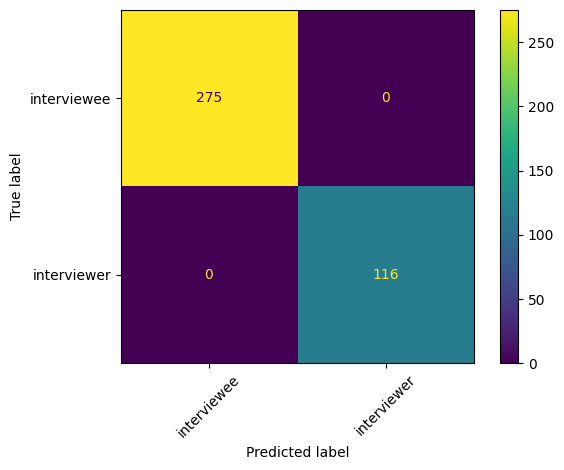

In [7]:
actual = ground_truth_csv['person_actual']
predicted = ground_truth_csv['person_classified']

# Get unique sorted labels to ensure consistency in the confusion matrix
if len(actual.unique()) > len(predicted.unique()):
    labels = sorted(actual.unique())
else:
    labels = sorted(predicted.unique())

# Compute the confusion matrix
cm = confusion_matrix(actual, predicted, labels=labels)

# Display the confusion matrix with proper labels
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot()  # Optional: add color for better visualization
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Performance Metrics

### Weighted Average

In [8]:
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, average='weighted', zero_division=0)
recall = recall_score(actual, predicted, average='weighted', zero_division=0)
f1_score_val = f1_score(actual, predicted, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1_score_val:.6f}")

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1-Score: 1.000000


### Micro Average

In [9]:
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, average='micro', zero_division=0)
recall = recall_score(actual, predicted, average='micro', zero_division=0)
f1_score_val = f1_score(actual, predicted, average='micro', zero_division=0)

print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1_score_val:.6f}")

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1-Score: 1.000000


### Macro Average

In [10]:
accuracy = accuracy_score(actual, predicted)
precision = precision_score(actual, predicted, average='macro', zero_division=0)
recall = recall_score(actual, predicted, average='macro', zero_division=0)
f1_score_val = f1_score(actual, predicted, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.6f}")
print(f"Precision: {precision:.6f}")
print(f"Recall: {recall:.6f}")
print(f"F1-Score: {f1_score_val:.6f}")

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1-Score: 1.000000


### Overall Classification Report

In [11]:
report = classification_report(actual, predicted, target_names=labels, zero_division=0)

print(report)

              precision    recall  f1-score   support

 interviewee       1.00      1.00      1.00       275
 interviewer       1.00      1.00      1.00       116

    accuracy                           1.00       391
   macro avg       1.00      1.00      1.00       391
weighted avg       1.00      1.00      1.00       391

